In [1]:
%cd /home/yejin/data/projects/yejin/VerbCentric_RIS/ReferFormer

/data/projects/yejin/VerbCentric_RIS/ReferFormer


/home/yejin/.conda/envs/referformer/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from datasets import build_dataset
import argparse
import opts

import sys
from pathlib import Path
from os import path as osp

import numpy as np
import pandas as pd
import regex as re
import json

import cv2
from PIL import Image
import torch
from torchvision.transforms import functional as F
from skimage import io
from skimage import measure                        # (pip install scikit-image)
from shapely.geometry import Polygon, MultiPolygon # (pip install Shapely)

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import patches

import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
#데이터 불러오기
annotations = pd.read_json("/home/yejin/data/dataset/VRIS/mbench/ytvos/selected_instances.jsonl", lines = True)

In [7]:
def review_images(annotations, image_dir):
    index = 0

    #시각화 함수
    def showRef(i):
        nonlocal index
        print(index)

        if index < len(annotations):
            annotation = annotations.loc[index]
            
            ax = plt.gca()
            I = io.imread(osp.join(image_dir, annotation['file_name']))
            ax.imshow(I)

            file_name = annotation['file_name']
            raw_sent = annotation['sentences']['raw']

            polygons = []
            color = []
            c = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]
                
            if type(annotation['segmentation'][0]) == list:
                # polygon used for refcoco*

                for seg in annotation['segmentation']:
                    poly = np.array(seg).reshape((int(len(seg) / 2), 2))
                    polygons.append(Polygon(poly))
                    color.append(c)

                p = PatchCollection(polygons,
                                    facecolors=(221/255, 160/255, 221/255),  # 연보라색
                                    linewidths=0,
                                    alpha=0.4)
                ax.add_collection(p)
                    
                p = PatchCollection(polygons,
                                    facecolors='none',
                                    edgecolors=color,
                                    linewidths=2)
                ax.add_collection(p)
                
                ax.set_title(file_name)
                fig = plt.gcf()
                fig.text(0.5, 0, raw_sent, ha='center', fontsize=12, color='gray')


            
            else:
                print("No more images in the dataset")
                return


    #버튼 클릭 시 호출될 함수
    def on_button_click(b):
        nonlocal index
        index+=1

        clear_output(wait=True)
        showRef(index)
        
        if index < len(annotations):
            display(button)
        

    #버튼 생성
    button = widgets.Button(description = "Next image")
    button.on_click(on_button_click)

    
    #첫 이미지
    showRef(index)
    display(button)

    

In [8]:
#================segmentation이 2개 이상인 경우 확인=======================

# def review_images(annotations, image_dir):
#     index = 0

#     #시각화 함수
#     def showRef(i):
#         nonlocal index

#         if index < len(annotations):
#             annotation = annotations.loc[index]
            
#             ax = plt.gca()
#             I = io.imread(osp.join(image_dir, annotation['file_name']))
#             ax.imshow(I)

#             file_name = annotation['file_name']
#             raw_sent = annotation['sentences']['raw']

            
            
                
#             if type(annotation['segmentation'][0]) == list:
#                 # polygon used for refcoco*
#                 print(len(annotation['segmentation']))

#                 if len(annotation['segmentation']) > 1:
#                     for seg in annotation['segmentation']:
#                         polygons = []
#                         color = []
#                         c = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]

#                         poly = np.array(seg).reshape((int(len(seg) / 2), 2))
#                         polygons.append(Polygon(poly))
#                         color.append(c)

#                         p = PatchCollection(polygons,
#                                             facecolors=(221/255, 160/255, 221/255),  # 연보라색
#                                             linewidths=0,
#                                             alpha=0.4)
#                         ax.add_collection(p)
                            
#                         p = PatchCollection(polygons,
#                                             facecolors='none',
#                                             edgecolors=color,
#                                             linewidths=2)
#                         ax.add_collection(p)
                        
#                         ax.set_title(file_name)
#                         fig = plt.gcf()
#                         fig.text(0.5, 0, raw_sent, ha='center', fontsize=12, color='gray')
#                 else:
#                     polygons = []
#                     color = []
#                     c = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]

#                     for seg in annotation['segmentation']:
                        
#                         poly = np.array(seg).reshape((int(len(seg) / 2), 2))
#                         polygons.append(Polygon(poly))
#                         color.append(c)

#                     p = PatchCollection(polygons,
#                                             facecolors=(221/255, 160/255, 221/255),  # 연보라색
#                                             linewidths=0,
#                                             alpha=0.4)
#                     ax.add_collection(p)
                            
#                     p = PatchCollection(polygons,
#                                             facecolors='none',
#                                             edgecolors=color,
#                                             linewidths=2)
#                     ax.add_collection(p)
                        
#                     ax.set_title(file_name)
#                     fig = plt.gcf()
#                     fig.text(0.5, 0, raw_sent, ha='center', fontsize=12, color='gray')
                    


#             else:
#                 print("No more images in the dataset")
#                 return


#     #버튼 클릭 시 호출될 함수
#     def on_button_click(b):
#         nonlocal index
#         index+=1

#         clear_output(wait=True)
#         showRef(index)
        
#         if index < len(annotations):
#             display(button)
        

#     #버튼 생성
#     button = widgets.Button(description = "Next image")
#     button.on_click(on_button_click)

    
#     #첫 이미지
#     showRef(index)
#     display(button)

    

1194


Button(description='Next image', style=ButtonStyle())

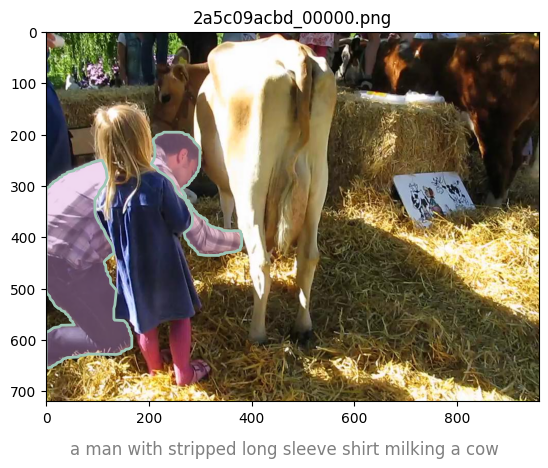

In [ ]:
review_images(annotations, image_dir='/home/yejin/data/dataset/VRIS/mbench/ytvos/selected_frames')